In [32]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
import psycopg2
from psycopg2 import Error

import os
path = os.path.join(os.path.expanduser('~'), 'Documents', 'github.passwords', 'energy.predictor.2020.config')
print (path)

myfile = open(path,"rt")
config= myfile.read()

/home/douglas/Documents/github.passwords/energy.predictor.2020.config


## Distribution

### Number of data points per meter type

In [34]:
connection = psycopg2.connect(config)

cursor = connection.cursor()

In [35]:
# Read PostgreSQL into a dataframe
sql =''' SELECT 
            t.timestamp,
            t.meter,
            t.meter_reading
        FROM 
             weather_train AS w
         INNER JOIN building_metadata AS bm
             ON (bm.site_id = w.site_id)
         INNER JOIN train AS t
             ON (t.timestamp = w.timestamp) AND (t.building_id = bm.building_id)
         WHERE 
             w.timestamp IS NOT NULL 
             AND w.air_temperature IS NOT NULL 
             AND w.dew_temperature IS NOT NULL
             AND w.sea_level_pressure IS NOT NULL 
             AND w.wind_direction IS NOT NULL 
             AND w.wind_speed IS NOT NULL
            ;'''
meter_distribution = pd.read_sql_query(sql,connection)

In [36]:
if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL connection is closed


In [37]:
meter_distribution

,timestamp,meter,meter_reading
0,2016-01-01,0,0.0000
1,2016-01-01,1,11.1132
2,2016-01-01,0,2027.5200
3,2016-01-01,0,360.9800
4,2016-01-01,1,13.7861
...,...,...,...
17684649,2016-01-01,0,28.0638
17684650,2016-01-01,3,9.7989
17684651,2016-01-01,0,9.4350
17684652,2016-01-01,3,100.0000


<AxesSubplot:xlabel='meter', ylabel='count'>

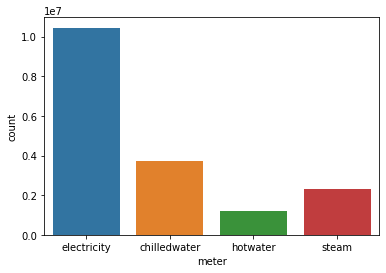

In [40]:
meterName = {0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'}
meter_distribution['meter'] = meter_distribution['meter'].map(meterName)

sns.countplot(x='meter',data=meter_distribution)

### Meter distribution

In [42]:
connection = psycopg2.connect(config)

cursor = connection.cursor()

In [43]:
# Read PostgreSQL into a dataframe
sql =''' SELECT 
            bm.site_id,
            bm.building_id,
            t.meter
        FROM 
             weather_train AS w
         INNER JOIN building_metadata AS bm
             ON (bm.site_id = w.site_id)
         INNER JOIN train AS t
             ON (t.timestamp = w.timestamp) AND (t.building_id = bm.building_id)
         WHERE 
             w.timestamp IS NOT NULL 
             AND w.air_temperature IS NOT NULL 
             AND w.dew_temperature IS NOT NULL
             AND w.sea_level_pressure IS NOT NULL 
             AND w.wind_direction IS NOT NULL 
             AND w.wind_speed IS NOT NULL
            ;'''
meter_distribution = pd.read_sql_query(sql,connection)

In [44]:
if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL connection is closed


<AxesSubplot:xlabel='meter', ylabel='count'>

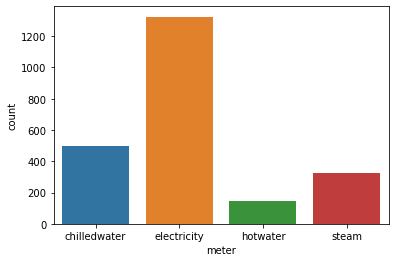

In [45]:
meter_distribution = meter_distribution.drop_duplicates()

meter_distribution['meter'] = meter_distribution['meter'].map(meterName)

sns.countplot(x='meter',data=meter_distribution)

### Where are they located, site id breakdown

In [46]:
connection = psycopg2.connect(config)

cursor = connection.cursor()

In [47]:
# Read PostgreSQL into a dataframe
sql =''' SELECT 
            bm.site_id,
            bm.building_id,
            t.meter
        FROM 
             weather_train AS w
         INNER JOIN building_metadata AS bm
             ON (bm.site_id = w.site_id)
         INNER JOIN train AS t
             ON (t.timestamp = w.timestamp) AND (t.building_id = bm.building_id)
         WHERE 
             w.timestamp IS NOT NULL 
             AND w.air_temperature IS NOT NULL 
             AND w.dew_temperature IS NOT NULL
             AND w.sea_level_pressure IS NOT NULL 
             AND w.wind_direction IS NOT NULL 
             AND w.wind_speed IS NOT NULL
            ;'''
meter_distribution = pd.read_sql_query(sql,connection)

In [48]:
if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL connection is closed


<AxesSubplot:xlabel='site_id', ylabel='count'>

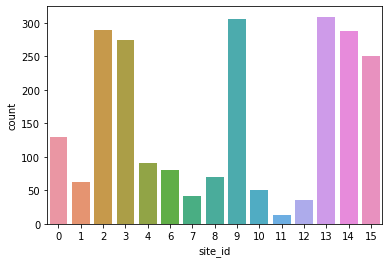

In [49]:
meter_distribution = meter_distribution.drop_duplicates()



sns.countplot(x='site_id',data=meter_distribution)

#### Observation

Should sites below 100, 150 be dropped?

### Distribution of Square Feet

In [54]:
connection = psycopg2.connect(config)

cursor = connection.cursor()

# Read PostgreSQL into a dataframe
sql =''' SELECT 
            bm.building_id,
            bm.square_feet
        FROM 
             weather_train AS w
         INNER JOIN building_metadata AS bm
             ON (bm.site_id = w.site_id)
         INNER JOIN train AS t
             ON (t.timestamp = w.timestamp) AND (t.building_id = bm.building_id)
         WHERE 
             w.timestamp IS NOT NULL 
             AND w.air_temperature IS NOT NULL 
             AND w.dew_temperature IS NOT NULL
             AND w.sea_level_pressure IS NOT NULL 
             AND w.wind_direction IS NOT NULL 
             AND w.wind_speed IS NOT NULL
            ;'''
sf_distribution = pd.read_sql_query(sql,connection)

if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL connection is closed


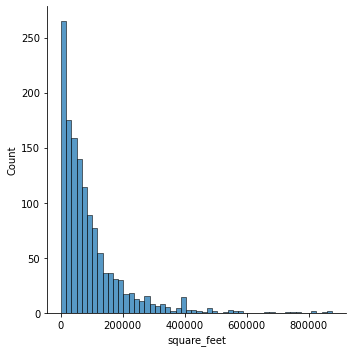

In [57]:
sf_distribution = sf_distribution.drop_duplicates()



sns.displot(sf_distribution.square_feet)

#### Observations

Lower square foot buildings may have more clear relationship to energy use

### Building Use

In [71]:
connection = psycopg2.connect(config)

cursor = connection.cursor()

# Read PostgreSQL into a dataframe
sql =''' SELECT 
            COUNT(DISTINCT bm.primary_use)
        FROM 
             weather_train AS w
         INNER JOIN building_metadata AS bm
             ON (bm.site_id = w.site_id)
         INNER JOIN train AS t
             ON (t.timestamp = w.timestamp) AND (t.building_id = bm.building_id)
         WHERE 
             w.timestamp IS NOT NULL 
             AND w.air_temperature IS NOT NULL 
             AND w.dew_temperature IS NOT NULL
             AND w.sea_level_pressure IS NOT NULL 
             AND w.wind_direction IS NOT NULL 
             AND w.wind_speed IS NOT NULL
            ;'''
primary_use_count = pd.read_sql_query(sql,connection)

if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL connection is closed


In [72]:
primary_use_count

,count
0,16


In [73]:
connection = psycopg2.connect(config)

cursor = connection.cursor()

# Read PostgreSQL into a dataframe
sql =''' SELECT 
            bm.building_id,
            bm.primary_use
        FROM 
             weather_train AS w
         INNER JOIN building_metadata AS bm
             ON (bm.site_id = w.site_id)
         INNER JOIN train AS t
             ON (t.timestamp = w.timestamp) AND (t.building_id = bm.building_id)
         WHERE 
             w.timestamp IS NOT NULL 
             AND w.air_temperature IS NOT NULL 
             AND w.dew_temperature IS NOT NULL
             AND w.sea_level_pressure IS NOT NULL 
             AND w.wind_direction IS NOT NULL 
             AND w.wind_speed IS NOT NULL
            ;'''
pu_distribution = pd.read_sql_query(sql,connection)

if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL connection is closed


[Text(0, 0, 'Office'),
 Text(1, 0, 'Education'),
 Text(2, 0, 'Lodging/residential'),
 Text(3, 0, 'Entertainment/public assembly'),
 Text(4, 0, 'Other'),
 Text(5, 0, 'Retail'),
 Text(6, 0, 'Parking'),
 Text(7, 0, 'Public services'),
 Text(8, 0, 'Food sales and service'),
 Text(9, 0, 'Utility'),
 Text(10, 0, 'Healthcare'),
 Text(11, 0, 'Warehouse/storage'),
 Text(12, 0, 'Religious worship'),
 Text(13, 0, 'Technology/science'),
 Text(14, 0, 'Services'),
 Text(15, 0, 'Manufacturing/industrial')]

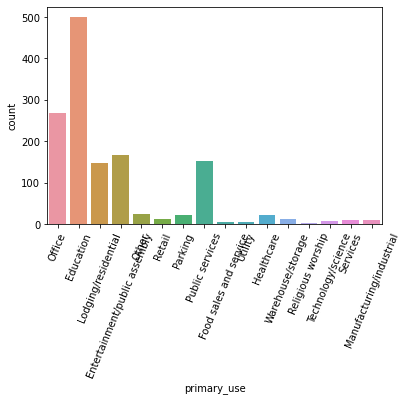

In [76]:
pu_distribution = pu_distribution.drop_duplicates()



chart=sns.countplot(x='primary_use',data=pu_distribution)
chart.set_xticklabels(chart.get_xticklabels(), rotation=67.5)